In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from matplotlib.colors import hsv_to_rgb

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Optical flow
select some corners in the first frame and track them through the video

In [3]:
cap = cv.VideoCapture('/content/drive/MyDrive/vision/senza_ombre_motog5.mp4')

# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 10,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7)

# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 0.03))

# Create some random colors
color = np.random.randint(0,255,(100,3))

# Take first frame and find corners in it
ret, old_frame = cap.read()
for i in range(100):
  ret, old_frame = cap.read()
old_gray = cv.cvtColor(old_frame, cv.COLOR_BGR2GRAY)
p0 = cv.goodFeaturesToTrack(old_gray, mask = None, **feature_params)

# Create a mask image for drawing purposes
mask = np.zeros_like(old_frame)
processed_frames = []
while (1):
    ret,frame = cap.read()
    if not ret:
      break
    frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

    # calculate optical flow
    p1, st, err = cv.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None)

    # Select good points
    good_new = p1[st==1]
    good_old = p0[st==1]

    # draw the tracks
    for i,(new,old) in enumerate(zip(good_new,good_old)):
        a,b = new.ravel()
        c,d = old.ravel()
        mask = cv.line(mask, (a,b),(c,d), color[i].tolist(), 2)
        frame = cv.circle(frame,(a,b),5,color[i].tolist(),-1)
    img = cv.add(frame,mask)

    processed_frames.append(img)

    # Now update the previous frame and previous points
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1,1,2)

cap.release()

show a frame from the result

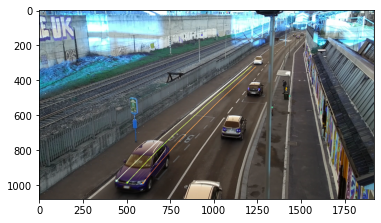

In [4]:
plt.imshow(processed_frames[100])
optical = Image.fromarray(cv.cvtColor(processed_frames[100], cv.COLOR_BGR2RGB))
optical.save('optical.png')

output the result

In [ ]:
out = cv.VideoWriter('/content/drive/MyDrive/vision/opticalFlow.mp4',cv.VideoWriter_fourcc(*'DIVX'), 24, (1920,1080))

for i in range(len(processed_frames)):
    # writing to a image array
    out.write(processed_frames[i])
    print('processed frame ', i)

out.release()

In [ ]:
from google.colab import files
files.download('/content/drive/MyDrive/vision/opticalFlow.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Dense optical flow
calculate the optical flow of all the pixels. in the output colour(hue) represents direction of movement and intensity(value) represents speed of flow

In [5]:
cap = cv.VideoCapture("/content/drive/MyDrive/vision/senza_ombre_motog5.mp4")
ret, frame1 = cap.read()
prvs = cv.cvtColor(frame1,cv.COLOR_BGR2GRAY)
hsv = np.zeros_like(frame1)
hsv[...,1] = 255

In [6]:
processed_frames = []
while(1):
    ret, frame2 = cap.read()
    if not ret:
      break
    next = cv.cvtColor(frame2,cv.COLOR_BGR2GRAY)

    flow = cv.calcOpticalFlowFarneback(prvs,next, None, 0.5, 3, 15, 3, 5, 1.2, 0)

    mag, ang = cv.cartToPolar(flow[...,0], flow[...,1])
    hsv[...,0] = ang*180/np.pi/2
    hsv[...,2] = cv.normalize(mag,None,0,255,cv.NORM_MINMAX)
    rgb = cv.cvtColor(hsv,cv.COLOR_HSV2BGR)
    processed_frames.append(rgb)
    prvs = next

cap.release()

KeyboardInterrupt: ignored

show an example frame from the result

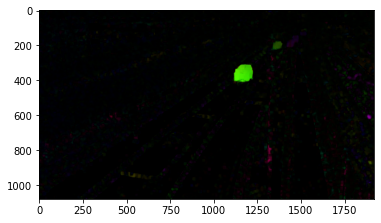

In [12]:
plt.imshow(processed_frames[120])

In [ ]:
out = cv.VideoWriter('/content/drive/MyDrive/vision/denseFlow.mp4',cv.VideoWriter_fourcc(*'DIVX'), 24, (1920,1080))

for i in range(len(processed_frames)):
    # writing to a image array
    out.write(processed_frames[i])
    print('processed frame ', i)

out.release()

In [9]:
from google.colab import files
files.download('/content/drive/MyDrive/vision/denseFlow.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>